In [14]:
##############################################
## This example shows the idea of how to
## extract data from webpages using python.
##############################################

## Author: Andre Vieira da Silva 2020-09-23

# importing the libraries
import requests
import csv
import json
from functools import reduce
import itertools
import re
import yaml
import numpy
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import time
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [15]:
############################################################
# scraping.py:
#   - scraping data from bitcointrade and store file.txt to
#   to plot using matplotlib.
############################################################

print("Starting to Web scraping data!")

# Convert list to Dictionary
def listToDict(lst, start, end):
    op = {lst[i]: lst[i + 1] for i in range(start, end, 2)}
    return op

Starting to Web scraping data!


In [16]:
# Step 1: Sending a HTTP request to a URL
url = "https://api.bitcointrade.com.br/v3/public/BRLETH/trades?start_time=2020-09-11T00:00:00-03:00&end_time=2020-12-02T23:59:59-03:00&page_size=1000&current_page=1"

# We use try-except incase the request was unsuccessful because of 
# wrong URL
try:
   page = urlopen(url)
   print("URL has successfully opened!")
except:
   print("Error opening the URL")

# Make a GET request to fetch the raw HTML content
html_cont = requests.get(url).text
html_cont_dict = json.loads(html_cont)

# get data from html:
data_1 = html_cont_dict.get('data')

infodata = data_1.get('trades')

# make some ajustment to parsing.
expected_output1=re.sub(":",",",str(infodata))
out1=expected_output1.replace("{", "")
res1=out1.replace("}", "")
data = yaml.full_load(res1)

# size, number, items elements from data,  
size=len(data)
number_elem=size/12
number_items = int(number_elem)

URL has successfully opened!


In [17]:
# vector with info:
# 1) Operation type: buy or sell
# 2) Amount of coins
# 3) Price at the moment.
vec_type_amount_price = numpy.zeros(shape=(3,number_items))

# variables set to zero.
count_buyers=0
count_sellers=0

tot_amount_buy=0
tot_amount_sell=0

### get info - buy/sell : 
###  1) type oder
###  2) amount 
###  3) price

jj=0

for j in range(0,number_items):

    # convert list to Dict. 
    lst1=listToDict(data,jj,jj+12)
    type_order=lst1.get('type')
    if( type_order == "buy"): 
        type_order=0
        count_buyers = count_buyers + 1
    else:
        type_order=1
        count_sellers = count_sellers + 1

    vec_type_amount_price[0][j] =type_order

    amount_order=lst1.get('amount')
    vec_type_amount_price[1][j] =amount_order

    price_unit=lst1.get('unit_price')
    vec_type_amount_price[2][j]= price_unit

    jj = jj+12

In [18]:
# get the total of buyers and sellers
total_buy_sell = count_buyers + count_sellers

# precision
prec =5

# percentage of buyers and sellers
per_buyers=float(count_buyers)
per_sellers=float(count_sellers)

# set precision 
per_buyers=round(per_buyers/total_buy_sell, prec)
per_sellers=round(per_sellers/total_buy_sell, prec)

# print the info percentage of buyers/sellers:
print("Number of buyers = ", round(per_buyers, prec))
print("Number of sellers = ", round(per_sellers, prec))

# get the total of amount of the coin buyers/sellers
for j in range(0,number_items):
    if(vec_type_amount_price[0][j] == 0): 
        tot_amount_buy = tot_amount_buy + vec_type_amount_price[1][j]
    else:
        tot_amount_sell = tot_amount_sell + vec_type_amount_price[1][j]

tot_amount_buy_sell = tot_amount_buy + tot_amount_sell

per_qtd_buyers=round(tot_amount_buy/tot_amount_buy_sell, prec)
per_qtd_sellers=round(tot_amount_sell/tot_amount_buy_sell, prec)

print("qtd. total buy  = ", per_qtd_buyers)
print("qtd. total sell = ", per_qtd_sellers)

amount_biggest_buy=0
amount_biggest_sell=0

### get the biggest amount buy/sell at the moment!
for j in range(0,number_items):
    if(vec_type_amount_price[0][j] == 0): 
        if( vec_type_amount_price[1][j] >= amount_biggest_buy):
            amount_biggest_buy = vec_type_amount_price[1][j]
    else:
        if( vec_type_amount_price[1][j] >= amount_biggest_sell):
            amount_biggest_sell = vec_type_amount_price[1][j]

print("total amount buy  = ", round(tot_amount_buy, prec))
print("total amount sell = ", round(tot_amount_sell, prec))

print("the biggest amount buy  = ", round(amount_biggest_buy, prec))
print("the biggest amount sell = ", round(amount_biggest_sell, prec))

per_biggest_buy = round(amount_biggest_buy/tot_amount_buy, prec)
per_biggest_sell = round(amount_biggest_sell/tot_amount_sell, prec)

print("percentage of the biggest amount buy of the total  = ", per_biggest_buy)
print("percentage of the biggest amount sell of the total = ", per_biggest_sell)

Number of buyers =  0.628
Number of sellers =  0.372
qtd. total buy  =  0.76476
qtd. total sell =  0.23524
total amount buy  =  135.37266
total amount sell =  41.63981
the biggest amount buy  =  6.16479
the biggest amount sell =  2.4
percentage of the biggest amount buy of the total  =  0.04554
percentage of the biggest amount sell of the total =  0.05764


In [19]:
# percentage...
per_buyers = round(per_buyers*100, prec)
per_sellers = round(per_sellers*100, prec)

per_qtd_buyers = round(per_qtd_buyers*100, prec)
per_qtd_sellers = round(per_qtd_sellers*100, prec)

per_biggest_buy = round(per_biggest_buy*100, prec)
per_biggest_sell = round(per_biggest_sell*100, prec)

### save data to file.txt
f = open('infodata.txt', 'w+')
# write info data in the file.
f.write("%0.2f %5.2f\n" % (per_buyers, per_sellers))
f.write("%0.2f %5.2f\n" % (per_qtd_buyers, per_qtd_sellers))
f.write("%0.2f %5.2f\n" % (per_biggest_buy, per_biggest_sell))

#time.sleep(30)
print("data save! all done, :)")

data save! all done, :)


In [20]:
# importing the libraries
import numpy
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import time

# loop to be constantly scraping data from webpage
# for one period of time, feel free to change as you like.
#for k in range(1,10000):

# Open a file: file
file = open("infodata.txt", "r") 

# array to store data to plot
vec_infodata= numpy.zeros(shape=(3,2))

# read line by line from infodata.txt
iline=0
for line in file:
    vec_infodata[iline][0] = float(line[0:5])
    vec_infodata[iline][1] = float(line[6:11])
    iline =iline+1

# variables
per_buyers = vec_infodata[0][0]
per_sellers = vec_infodata[0][1]

per_qtd_buyers = vec_infodata[1][0]
per_qtd_sellers = vec_infodata[1][1]

per_biggest_buy = vec_infodata[2][0]
per_biggest_sell = vec_infodata[2][1]

#print("biggest order sell ETH = ", per_biggest_sell)

# close plt.
#plt.ion()

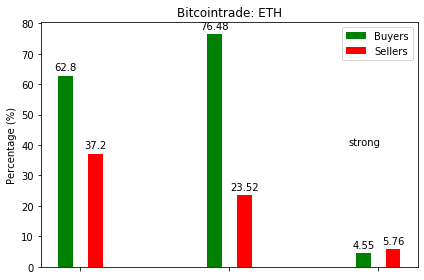

save plot, please and all done!


In [21]:
# plot:
labels = ['','','']
buy_means = [per_buyers, per_qtd_buyers, per_biggest_buy]
sell_means = [per_sellers, per_qtd_sellers, per_biggest_sell]

colors_buy = ['g','g','g']
colors_sell = ['r','r','r']

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, buy_means, width, label='Buyers', color=colors_buy)
rects2 = ax.bar(x + width, sell_means, width, label='Sellers', color=colors_sell)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage (%)')
ax.set_title('Bitcointrade: ETH')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

# indicator: force.
if(60>= per_buyers >= 50):        
    plt.text(1.8, 40., "moderate")
if(70 >= per_buyers >= 60):
    plt.text(1.8, 40., "strong")
if(per_buyers >= 70):
    plt.text(1.8, 40., "very strong")
if(40 <= per_buyers <= 50):
    plt.text(1.8, 40., "attention")
if(30 <= per_buyers <= 40):
    plt.text(1.8, 40., "weak")
if(20 <= per_buyers <= 30):
    plt.text(1.8, 40., "very weak")

plt.savefig('scraping.pdf')
#plt.close()
plt.show()
#plt.pause(30)

print("save plot, please and all done!")